In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/home/lagvna/WykazCzasopism/resources/wykaz.csv")

/home/lagvna/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,Wykaz czasopism naukowych,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,archeologia,filozofia,...,prawo kanoniczne,psychologia,astronomia,informatyka,matematyka,nauki biologiczne,nauki chemiczne,nauki fizyczne,nauki o Ziemi i środowisku,nauki teologiczne
2,Lp.,Tytuł 1,issn,e-issn,Tytuł 2,issn,e-issn,Punkty,101,102,...,510,511,601,602,603,604,605,606,607,701
3,1,2D Materials,2053-1583,2053-1583,2D Materials,NaN,2053-1583,140,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,x,x,NaN,NaN
4,2,3 Biotech,2190-572X,2190-5738,3 Biotech,2190-572X,2190-5738,70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN


In [4]:
df.columns = df.iloc[2]

In [5]:
df.drop([0, 1, 2], inplace = True)

In [6]:
df = df[['Tytuł 1', 'Punkty']]

In [7]:
df['Punkty'].nunique()

12

In [8]:
df.head()

2,Tytuł 1,Punkty
3,2D Materials,140
4,3 Biotech,70
5,3C Empresa,20
6,3c Tecnologia,20
7,3C Tic,20


In [9]:
length = len(df)
midpoint = int(0.7 * length)

In [10]:
df.reindex(np.random.permutation(df.index))
train = df[:midpoint]
test = df[midpoint:]

In [11]:
from tensorflow.keras.utils import to_categorical

training_sentences = [i for i in train['Tytuł 1']]
testing_sentences = [i for i in test['Tytuł 1']]
training_labels = [int(i) for i in train['Punkty']]
testing_labels = [int(i) for i in test['Punkty']]

training_labels = training_labels
testing_labels = testing_labels


training_labels_final = to_categorical(training_labels)
testing_labels_final = to_categorical(testing_labels)

In [12]:
vocab_size = 10000
embedding_dim = 16
max_length = 20
trunc_type='post'
oov_tok = "<OOV>"

In [47]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

print(tokenizer)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(201, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 16)            160000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                780       
_________________________________________________________________
dense_5 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_6 (Dense)              (None, 201)               2613      
Total params: 173,149
Trainable params: 173,149
Non-trainable params: 0
_________________________________________________________________


In [33]:
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/50
636/636 [==============================] - 8s 13ms/step - loss: 1.9054 - accuracy: 0.2371 - val_loss: 1.4808 - val_accuracy: 0.0808
Epoch 2/50
636/636 [==============================] - 10s 16ms/step - loss: 1.6218 - accuracy: 0.2662 - val_loss: 1.1531 - val_accuracy: 0.5655
Epoch 3/50
636/636 [==============================] - 9s 14ms/step - loss: 1.4882 - accuracy: 0.3497 - val_loss: 1.1883 - val_accuracy: 0.5280
Epoch 4/50
636/636 [==============================] - 11s 17ms/step - loss: 1.3974 - accuracy: 0.4069 - val_loss: 1.3382 - val_accuracy: 0.3988
Epoch 5/50
636/636 [==============================] - 9s 14ms/step - loss: 1.3126 - accuracy: 0.4553 - val_loss: 1.3757 - val_accuracy: 0.4312
Epoch 6/50
636/636 [==============================] - 11s 17ms/step - loss: 1.2289 - accuracy: 0.5117 - val_loss: 1.4800 - val_accuracy: 0.3245
Epoch 7/50
636/636 [==============================] - 11s 17ms/step - loss: 1.1572 - accuracy: 0.5404 - val_loss: 1.5557 - val_accuracy: 0.

In [34]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

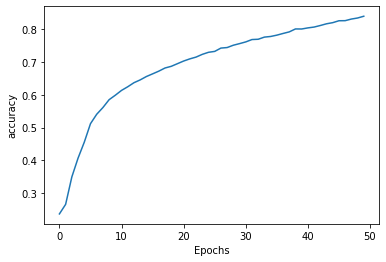

In [35]:
plot_graphs(history, 'accuracy')

In [56]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

print(word_index)

def decode_title(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

title = 'distributed computing'
token_list = tokenizer.texts_to_sequences([title])[0]
print(token_list)
token_list = pad_sequences([token_list], maxlen=max_length-1, padding='post')
print(token_list)
predicted = model.predict_classes(token_list, verbose=0)
print(predicted)


print(decode_title('distributed computing'))


{'<OOV>': 1, 'of': 2, 'journal': 3, 'and': 4, 'international': 5, 'in': 6, 'research': 7, 'de': 8, 'science': 9, 'the': 10, 'revista': 11, 'review': 12, 'studies': 13, 'engineering': 14, 'medicine': 15, 'education': 16, 'health': 17, 'management': 18, 'sciences': 19, 'technology': 20, 'european': 21, 'clinical': 22, 'american': 23, 'society': 24, 'applied': 25, 'on': 26, 'systems': 27, 'history': 28, 'social': 29, 'law': 30, 'for': 31, 'y': 32, 'chemistry': 33, 'medical': 34, 'a': 35, 'acta': 36, 'psychology': 37, 'materials': 38, 'biology': 39, 'economics': 40, 'transactions': 41, 'e': 42, 'physics': 43, 'information': 44, 'policy': 45, 'environmental': 46, 'practice': 47, 'mathematics': 48, 'quarterly': 49, 'reviews': 50, 'development': 51, 'surgery': 52, 'current': 53, 'ieee': 54, 'bulletin': 55, 'theory': 56, 'molecular': 57, 'mathematical': 58, 'economic': 59, 'analysis': 60, 'reports': 61, 'care': 62, 'applications': 63, 'african': 64, 'letters': 65, 'advances': 66, 'human': 67, 